In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv("C:/Users/lenovo/Downloads/ML/diabetes.csv")

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#outliers 
#define a function called "plot_boxplot"
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(false)
    plt.show()

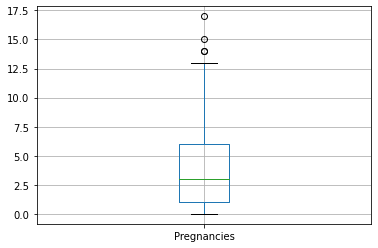

In [13]:
plot_boxplot(df, "Pregnancies")

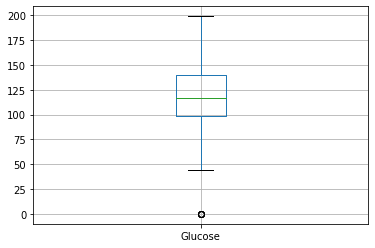

In [14]:
plot_boxplot(df, "Glucose")

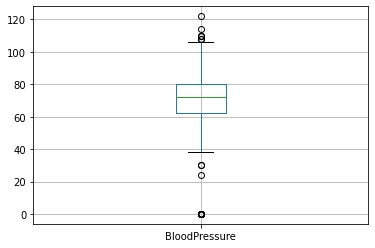

In [15]:
plot_boxplot(df, "BloodPressure")

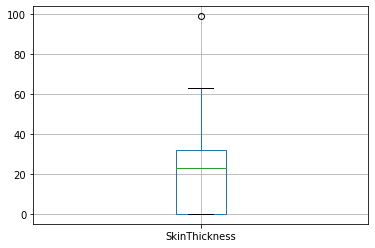

In [16]:
plot_boxplot(df, "SkinThickness")

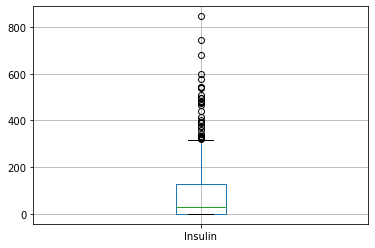

In [17]:
plot_boxplot(df, "Insulin")

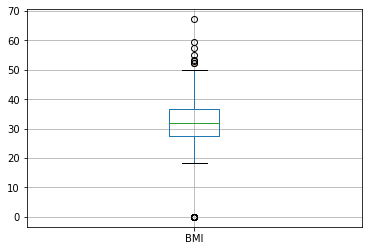

In [18]:
plot_boxplot(df, "BMI")

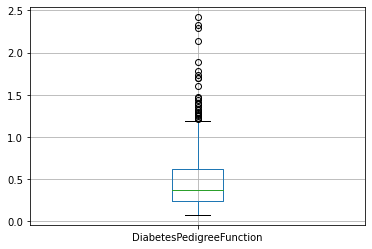

In [19]:
plot_boxplot(df, "DiabetesPedigreeFunction")

# remove outliers

In [23]:
#define a function called "outliers" which returns a list of index of outliers

# IQR= Q3-Q1
# + OR - 1.5*IQR
def outliers (df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR= Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    ls = df.index [(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [24]:
#Creat an empty list t store the output indices from multiple columns
index_list=[]
for data in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    index_list.extend(outliers(df, data))

In [25]:
index_list

[7,
 11,
 12,
 23,
 24,
 25,
 28,
 34,
 36,
 37,
 43,
 72,
 86,
 88,
 131,
 143,
 146,
 152,
 159,
 191,
 193,
 214,
 215,
 238,
 245,
 246,
 248,
 250,
 254,
 259,
 270,
 274,
 281,
 298,
 306,
 323,
 327,
 333,
 338,
 355,
 357,
 358,
 375,
 403,
 436,
 455,
 458,
 459,
 460,
 464,
 505,
 510,
 512,
 516,
 518,
 523,
 542,
 558,
 559,
 578,
 582,
 590,
 614,
 618,
 634,
 635,
 648,
 658,
 660,
 663,
 667,
 669,
 672,
 676,
 691,
 706,
 708,
 712,
 717,
 740,
 743,
 744,
 745,
 761,
 762,
 763,
 2,
 8,
 11,
 13,
 14,
 22,
 40,
 43,
 45,
 53,
 56,
 75,
 100,
 110,
 120,
 130,
 132,
 154,
 159,
 175,
 182,
 185,
 186,
 206,
 207,
 209,
 212,
 220,
 227,
 228,
 235,
 236,
 237,
 238,
 245,
 247,
 258,
 260,
 283,
 294,
 300,
 306,
 317,
 319,
 327,
 332,
 335,
 339,
 342,
 349,
 355,
 359,
 360,
 370,
 391,
 399,
 404,
 408,
 409,
 415,
 425,
 427,
 440,
 445,
 455,
 487,
 489,
 495,
 498,
 502,
 506,
 515,
 545,
 546,
 548,
 549,
 561,
 579,
 588,
 595,
 598,
 604,
 606,
 611,
 612,
 62

In [26]:
#define a function called "remove" which returns a cleaned dataframe without outliers
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [27]:
df_cleaned=remove(df, index_list)

In [29]:
df.shape

(768, 9)

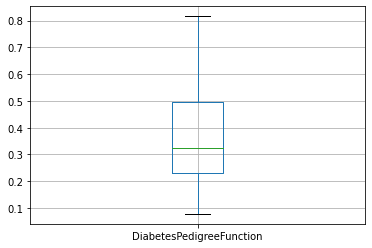

In [30]:
plot_boxplot(df_cleaned,'DiabetesPedigreeFunction' )

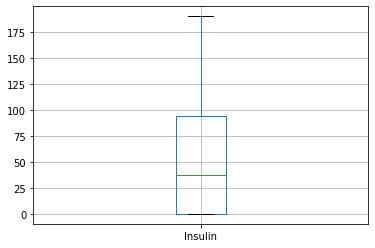

In [32]:
plot_boxplot(df_cleaned,'Insulin' )

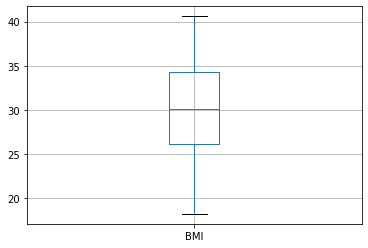

In [33]:
plot_boxplot(df_cleaned,'BMI')

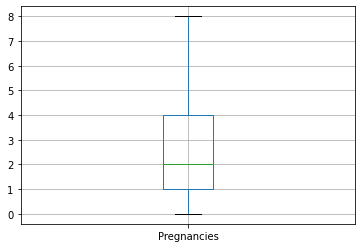

In [34]:
plot_boxplot(df_cleaned,'Pregnancies')

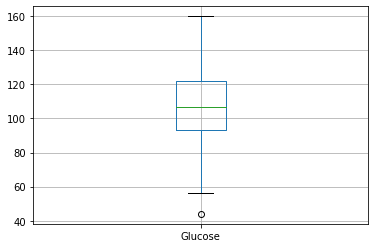

In [35]:
plot_boxplot(df_cleaned,'')

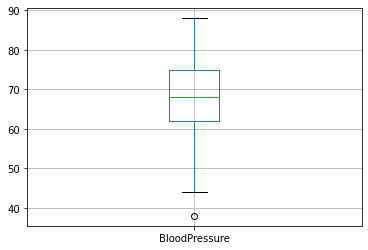

In [36]:
plot_boxplot(df_cleaned,'BloodPressure')

In [37]:
df_cleaned.to_csv('diabetes_cleaned.csv', index=False)